## Before Starting

In [1]:
!pip3 install pandas
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


# Bonus - 1
## Read and plot the data

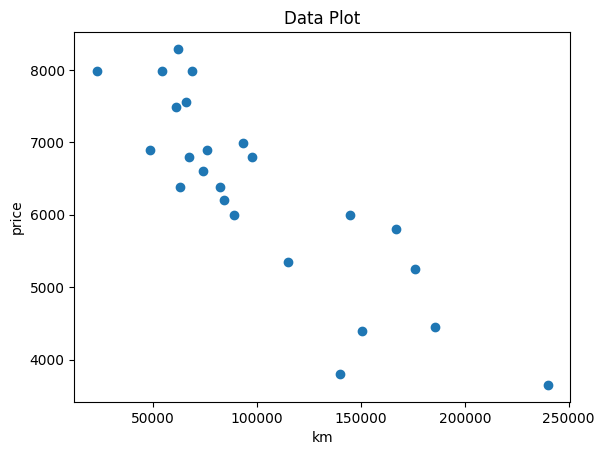

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file = pd.read_csv('data.csv')
data = pd.DataFrame(file)

# Plot the data
plt.scatter(data['km'], data['price'])
plt.xlabel('km')
plt.ylabel('price')
plt.title('Data Plot');

# Mandatory - 2
## Run second program for training

It will handle:
1. Initialization:
    - $\theta_0 = 0$ and $\theta_1 = 0$
    - $define\ estimatePrice(mileage) =  \theta_0 + (\theta_1 \times mileage)$
2. parse data into mileage and price
3. normalize the data:
    - $mileage = \frac{mileage}{max(mileage)}$
    - $price = \frac{price}{max(price)}$
4. Run the epochs:
    - ${\theta_0}_{tmp} = \alpha \times \frac{1}{m} \sum_{i=0}^{m-1}(cost(mileage[i])-price[i])$
    - ${\theta_1}_{tmp} = \alpha \times \frac{1}{m} \sum_{i=0}^{m-1}(cost(mileage[i])-price[i]) \times mileage[i]$
    - $\theta_0 = \theta_0 - {\theta_0}_{tmp}$
    - $\theta_1 = \theta_1 - {\theta_1}_{tmp}$
5. Save $\theta_0$ and $\theta_1$ into the file "params.txt".
6. Return $\theta_0$ and $\theta_1$

In [3]:
import program2 as p2

theta0, theta1 = p2.train(data)

print('theta0:', theta0)
print('theta1:', theta1)

theta0: 8433.895463712892
theta1: -0.02082418927299714


# Mandatory 1
## Run first program for prediction
It will handle:
1. Read "params.txt" and restore $\theta_0$ and $\theta_1$
2. apply $\theta_0 + \theta_1 \times mileage$ to prices
3. return the predicted prices

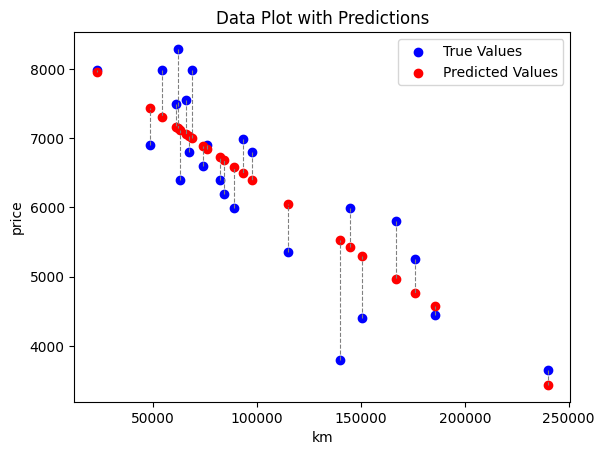

In [4]:
import program1 as p1

# Example data
x = data['km']
y_true = data['price']
y_pred = p1.predict(data)

plt.scatter(x, y_true, color='blue', label='True Values')
plt.scatter(x, y_pred, color='red', label='Predicted Values')

for xi, true, pred in zip(x, y_true, y_pred):
    plt.plot([xi, xi], [true, pred], color='gray', linestyle='--', linewidth=0.8)

plt.xlabel('km')
plt.ylabel('price')
plt.title('Data Plot with Predictions')
plt.legend()
plt.show()


# Bonus - 2
## Plot the line

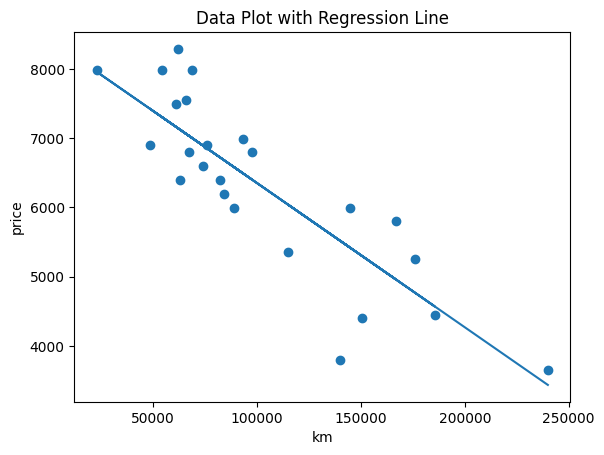

In [5]:
plt.scatter(x, y_true)
plt.plot(x, y_pred)
plt.xlabel('km')
plt.ylabel('price')
plt.title('Data Plot with Regression Line');

# Bonus 3
## Calculate precision: R-squared
$$R^2 = 1 - \frac{\sum_{i=1}^{m-1} (y[i] - \hat{y}[i])^2}{\sum_{i=1}^{m-1} (y[i] - \bar{y})^2}$$

Where

- $y[i]$ s are the actual values,
- $\hat{y}[i]$ s are the predicted values,
- $\bar{y}$ is the mean of the actual values,
- $m$ is the number of data points.

We wish $R^2 \approx 1$


In [6]:
R_squared = 1 - (sum((y_true - y_pred)**2) / sum((y_true - y_true.mean())**2))
print(R_squared)
print(f'So, it is {R_squared * 100:.2f}% accurate.')

0.7323488761115484
So, it is 73.23% accurate.


# Evaluation:
1. Running first program:

File 'params.txt' not found. Using default values for thetas.
Result for your input: 0
Result for your input: 6351.476536413178


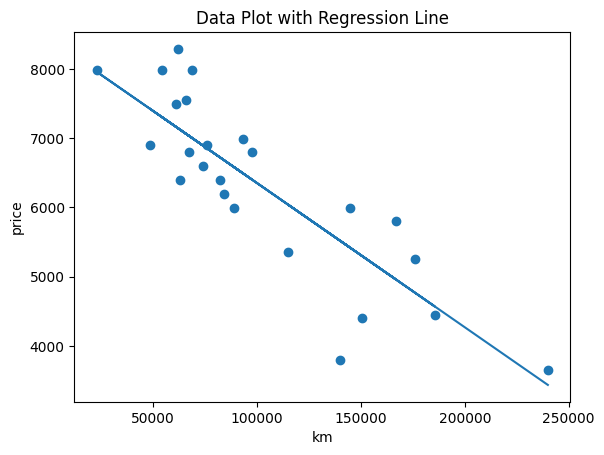

In [7]:
!rm -rf __pycache__
!rm -f params.txt
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
import program1 as p1
import program2 as p2

file = pd.read_csv('data.csv')
data = pd.DataFrame(file)

pred = p1.predict()
print('Result for your input:', pred)

p2.train(data)

y_pred = p1.predict(data)
x = data['km']
y_true = data['price']

plt.scatter(x, y_true)
plt.plot(x, y_pred)
plt.xlabel('km')
plt.ylabel('price')
plt.title('Data Plot with Regression Line');

pred = p1.predict()
print('Result for your input:', pred)

!rm -f params.txt